In [14]:
import os
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def generate_statistics(dataset):
    num_images = len(dataset)
    class_distribution = {}
    for _, label in dataset:
        class_name = dataset.classes[label]
        if class_name in class_distribution:
            class_distribution[class_name] += 1
        else:
            class_distribution[class_name] = 1

    print("Number of images:", num_images)
    print("Class distribution:", class_distribution)

In [5]:
train_folder = "kaggle_brain_tumor/Training"
test_folder = "kaggle_brain_tumor/Testing"

# Define transformations to be applied to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a fixed size
    transforms.ToTensor()  # Convert images to PyTorch tensors
])

# Create ImageFolder datasets
train_dataset = ImageFolder(root=train_folder, transform=transform)
test_dataset = ImageFolder(root=test_folder, transform=transform)

# Create DataLoader for efficient loading of data
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


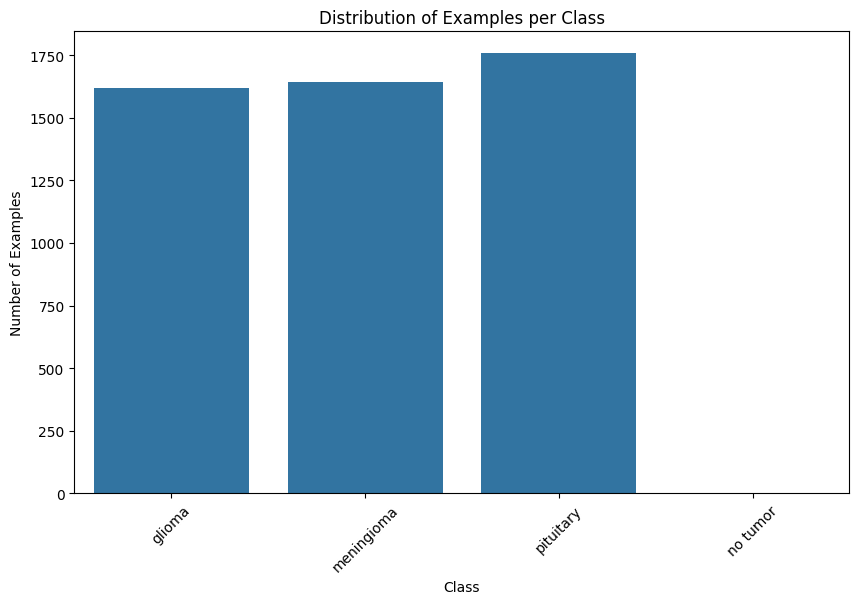

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order of classes
class_order = ['glioma', 'meningioma', 'pituitary', 'no tumor']

# Get the class names
class_names = train_dataset.classes

# Initialize dictionaries to count the number of examples per class for train and test datasets
train_class_counts = {class_name: 0 for class_name in class_names}
test_class_counts = {class_name: 0 for class_name in class_names}

# Iterate over the train dataset and count examples for each class
for _, label in train_dataset:
    train_class_counts[class_names[label]] += 1

# Iterate over the test dataset and count examples for each class
for _, label in test_dataset:
    test_class_counts[class_names[label]] += 1

# Combine the counts from train and test datasets
combined_class_counts = {class_name: train_class_counts[class_name] + test_class_counts[class_name] for class_name in class_names}




In [29]:
combined_class_counts

{'glioma': 1621, 'meningioma': 1645, 'notumor': 2000, 'pituitary': 1757}

In [30]:
correct_order={'glioma': 1621, 'meningioma': 1645, 'pituitary': 1757, 'notumor': 2000}

C:\Users\Csabi\AppData\Local\Temp\ipykernel_23448\1449930866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(correct_order.keys()), y=list(correct_order.values()), palette="viridis")


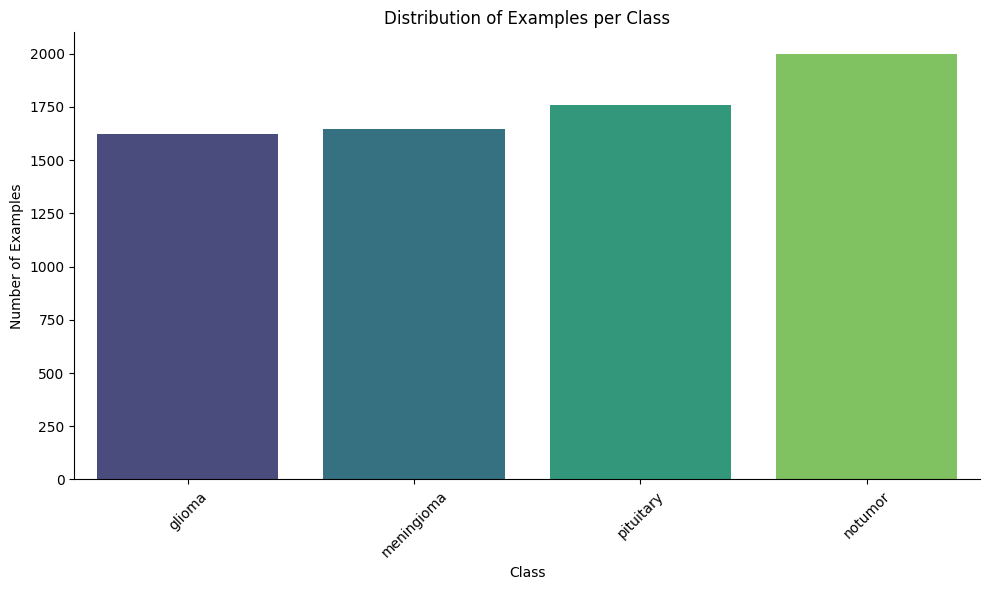

<Figure size 640x480 with 0 Axes>

In [34]:
# Plot the distribution of combined counts with the specified order
plt.figure(figsize=(10, 6))
sns.barplot(x=list(correct_order.keys()), y=list(correct_order.values()), palette="viridis")
plt.title('Distribution of Examples per Class')
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.xticks(rotation=45)
sns.despine()  # Remove top and right spines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('class_distribution_combined.png')
plt.show()


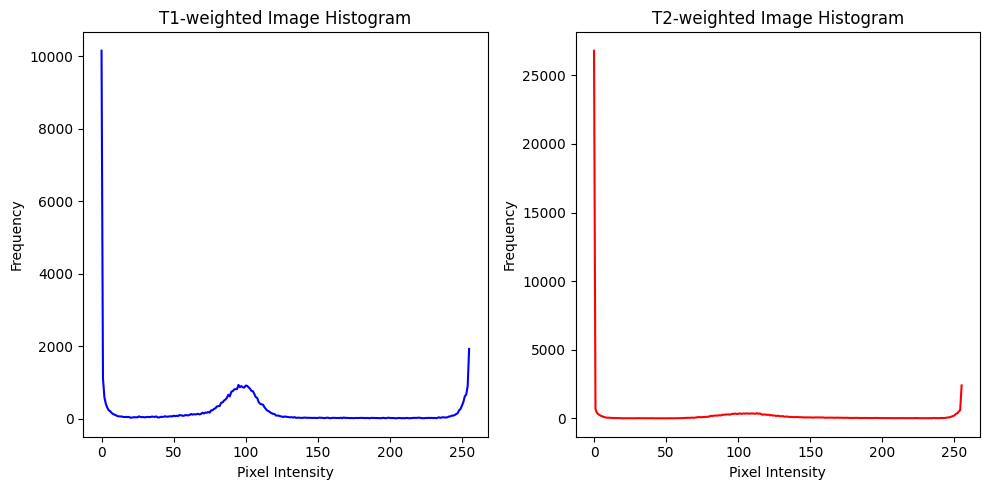

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load T1-weighted and T2-weighted MRI images
t1_image = cv2.imread('kaggle_brain_tumor/Testing/notumor/Te-no_0010.jpg')
t2_image = cv2.imread('kaggle_brain_tumor/Testing/notumor/Te-no_0011.jpg')

# Convert images to grayscale
t1_gray = cv2.cvtColor(t1_image, cv2.COLOR_BGR2GRAY)
t2_gray = cv2.cvtColor(t2_image, cv2.COLOR_BGR2GRAY)

# Calculate pixel intensity histograms
t1_hist = cv2.calcHist([t1_gray], [0], None, [256], [0, 256])
t2_hist = cv2.calcHist([t2_gray], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t1_hist, color='b')
plt.title('T1-weighted Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.plot(t2_hist, color='r')
plt.title('T2-weighted Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [24]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Resize Images to Ensure Same Size
min_height = min(t1_image.shape[0], t2_image.shape[0])
min_width = min(t1_image.shape[1], t2_image.shape[1])
t1_image = cv2.resize(t1_image, (min_width, min_height))
t2_image = cv2.resize(t2_image, (min_width, min_height))

# Reshape Images to 1D Arrays
t1_flat = t1_image.flatten().reshape(-1, 1)
t2_flat = t2_image.flatten().reshape(-1, 1)

# Concatenate Features
features = np.concatenate((t1_flat, t2_flat), axis=1)

# K-means Clustering with Different Cluster Numbers
k_range = range(2, 3)
scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    scores.append(silhouette_score(features, kmeans.labels_))

# Choose the Best K Based on Silhouette Score
best_k = k_range[np.argmax(scores)]

# Cluster Images
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(features)
cluster_labels = kmeans.labels_

# Plot Clustered Images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(t1_image, cmap='gray')
plt.title('T1-weighted MRI')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(t2_image, cmap='gray')
plt.title('T2-weighted MRI')
plt.axis('off')
plt.show()

# Plot K-means Clustering Results
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Pixel Intensity (T1-weighted)')
plt.ylabel('Pixel Intensity (T2-weighted)')
plt.colorbar(label='Cluster')
plt.show()


d:\Conda\envs\computer_vision_assignment_1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 